
### SVM (Support Vector Machine)

![](http://dblab.xmu.edu.cn/blog/wp-content/uploads/2016/12/svm-400x400.png)
\begin{align}\min ||w||^2 \end{align}

\begin{align}y_i(w^Tx_i+b) \geq 1\end{align}

\begin{align} min \textit{L}_p(W,b,\alpha) = \frac{1}{2}||w||^2 - \sum\alpha_i[y_i(w^Tx_i+b)-1] \end{align}

\begin{align} \alpha_i[y_i(w^Tx_i+b)-1] = 0 \end{align}

\begin{align} y = sgn(w^{*T}x+b^*) \end{align}

\begin{align} y = sgn(\sum\alpha^*_iy_ix_i^Tx_i+b^*) \end{align}

![](https://www.researchgate.net/profile/M_Sayed_Mouchaweh/publication/278488437/figure/fig1/AS:328658981015552@1455369815377/Example-of-two-non-linearly-separable-classes-in-two-dimensional-feature-space.png)

![](https://image.slidesharecdn.com/eventclassificationpredictionusingsupportvectormachine-160405104743/95/event-classification-prediction-using-support-vector-machine-17-638.jpg?cb=1459853447)

(Reference: [Albert Orriols-Puig Slide Note, Lecture12 - SVM](https://www.slideshare.net/aorriols/lecture12-svm))


like above, when dealing with less quantity datas, it was able to define functions wich can solve classification or regression problems.

However, when dealing with big data sets, it becomes almost impossible to define functions by person. 

To solve this problem, Neural Network was adopted as a breakthrough.


### Neural Network

\begin{align} y = f(w^T\phi(x)) \end{align}

\begin{align} J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2 \end{align}

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png?x31195" alt="Drawing" style="width: 500px;"/>


\begin{align} y = \sigma(w^Tx) \end{align}

\begin{align} J(\theta) = \sum_{i=1} (\sigma(w^Tx_i)-y_i)^2 \end{align}



Below is a simple example to see how neural network based machine learning algorithms work.

Of course the datasets are not that difficult, but since it is just an exercise, lets go for it.


In [1]:
import torch
print(torch.__version__)

1.6.0+cu101


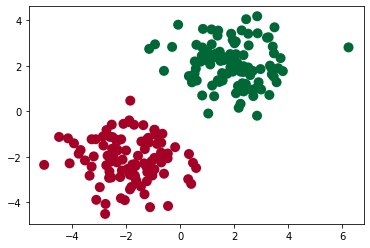

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


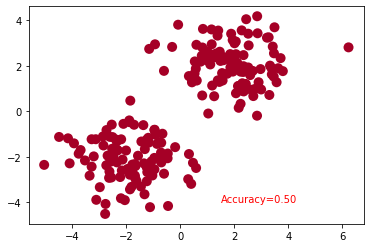

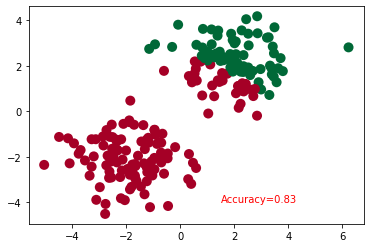

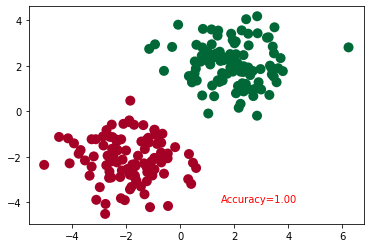

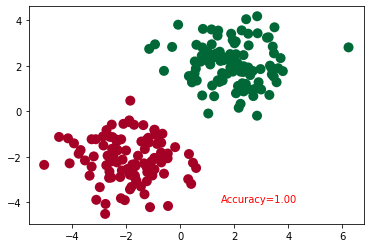

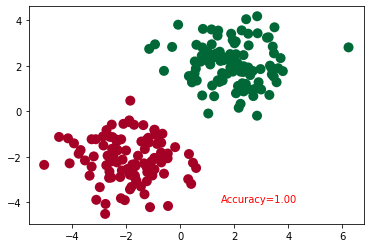

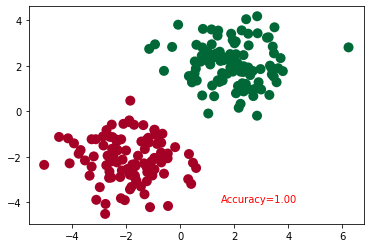

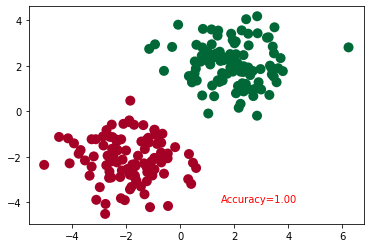

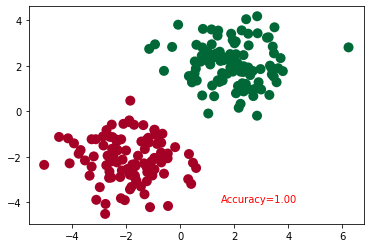

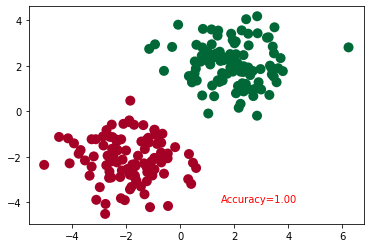

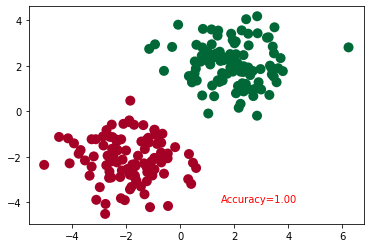

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# make fake data
n_data = torch.ones(100, 2)
# x data (tensor), shape=(100, 2)
x0 = torch.normal(2*n_data, 1)
x1 = torch.normal(-2*n_data, 1)
# y data (tensor), shape=(100, 2)
y0 = torch.cat((torch.zeros(100,1),torch.ones(100,1)),1)
y1 = torch.cat((torch.ones(100,1),torch.zeros(100,1)),1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating 

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy()[:,1], s=100, lw=0, cmap='RdYlGn')
plt.show()

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x),1)      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
# loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
loss_func = torch.nn.MSELoss()  # the target label is NOT an one-hotted

plt.ion()   # to keep showing the plot while running the for loop

for t in range(500):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_one_hot = torch.max(y, 1)[1]
        target_y = target_one_hot.data.numpy().squeeze()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

With lots of data and utilization of neural network, using gradient descent became a good but slow optimization method. 

In this reason, SGD and other various methods for optimization came out.

Gradient Descent
---
<img src="http://www.stronglyconvex.com/assets/img/gradient_descent/animation.gif" alt="Drawing" style="width: 600px;"/>

\begin{align} \theta^\prime = \theta - \eta \nabla J(\theta) \end{align}


### Stochastic Gradient Descent

<img src="https://image.slidesharecdn.com/random-170910154045/95/-40-638.jpg?cb=1505089848" alt="Drawing" style="width: 700px;"/>


With SGD, problems converged more faster, but still had lots of problems left. 

Still lots of methods are in development, but for our task, 'Adam' is good enough.

If you are curious about these methods, I recommend you to search for the actual papers about them.

### Other Methods

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Drawing" style="width: 500px;"/>

<img src="https://image.slidesharecdn.com/random-170910154045/95/-49-638.jpg?cb=1505089848" alt="Drawing" style="width: 700px;"/>
